In [2]:
import pandas as pd
titanic = pd.read_csv("dataanalysis/data/titanic.csv")
titanic['age'] = titanic['age'].replace(['?'], [None]).astype('float')
titanic['fare'] = titanic['fare'].replace(['?'], [None]).astype('float')

In [6]:
def years_to_days(years):
  return years * 365

titanic['age'].apply(years_to_days)

0       10585.0000
1         334.5955
2         730.0000
3       10950.0000
4        9125.0000
           ...    
1304     5292.5000
1305           NaN
1306     9672.5000
1307     9855.0000
1308    10585.0000
Name: age, Length: 1309, dtype: float64

In [7]:
def get_age_group(age):
  if age < 2:
    return 'infant'
  elif age < 12:
    return 'child'
  elif age < 18:
    return 'teen'
  elif age < 50:
    return 'adult'
  else:
    return 'seniour'

In [9]:
titanic['age_group'] = titanic['age'].apply(get_age_group)

<AxesSubplot:>

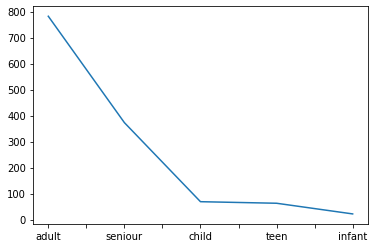

In [11]:
titanic['age_group'].value_counts().plot()

In [12]:
titanic.groupby('age_group').survived.mean()

age_group
adult      0.386189
child      0.492754
infant     0.772727
seniour    0.313673
teen       0.476190
Name: survived, dtype: float64

In [13]:
titanic.groupby(['sex','age_group']).survived.mean()

sex     age_group
female  adult        0.748201
        child        0.515152
        infant       0.888889
        seniour      0.698276
        teen         0.833333
male    adult        0.186508
        child        0.472222
        infant       0.692308
        seniour      0.140078
        teen         0.151515
Name: survived, dtype: float64

<AxesSubplot:xlabel='sex'>

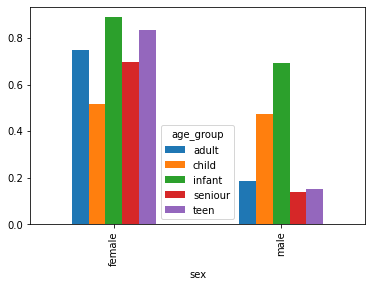

In [14]:
titanic.groupby(['sex','age_group']).survived.mean().unstack().plot(kind='bar')

<AxesSubplot:xlabel='age_group'>

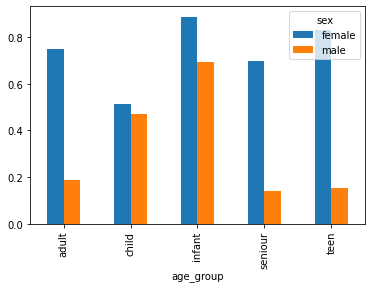

In [16]:
titanic.groupby(['sex','age_group']).survived.mean().unstack(level=0).plot(kind='bar')

### apply with lambdas and arguments


In [18]:
titanic['fare'] * 24

0       5072.1000
1       3637.2000
2       3637.2000
3       3637.2000
4       3637.2000
          ...    
1304     346.9008
1305     346.9008
1306     173.4000
1307     173.4000
1308     189.0000
Name: fare, Length: 1309, dtype: float64

In [19]:
titanic['fare'].apply(lambda x: f"${x * 24}")

0                   $5072.1
1       $3637.2000000000003
2       $3637.2000000000003
3       $3637.2000000000003
4       $3637.2000000000003
               ...         
1304              $346.9008
1305              $346.9008
1306    $173.39999999999998
1307    $173.39999999999998
1308                 $189.0
Name: fare, Length: 1309, dtype: object

In [20]:
def convert_curency(num, multiplier):
  return f"${num * multiplier}"

In [23]:
titanic['fare'].apply(convert_curency, args=(24,))

0                   $5072.1
1       $3637.2000000000003
2       $3637.2000000000003
3       $3637.2000000000003
4       $3637.2000000000003
               ...         
1304              $346.9008
1305              $346.9008
1306    $173.39999999999998
1307    $173.39999999999998
1308                 $189.0
Name: fare, Length: 1309, dtype: object

### apply to dataframe columns

In [26]:
df = titanic[['pclass','survived','age']]
df

,pclass,survived,age
0,1,1,29.0000
1,1,1,0.9167
2,1,0,2.0000
3,1,0,30.0000
4,1,0,25.0000
...,...,...,...
1304,3,0,14.5000
1305,3,0,NaN
1306,3,0,26.5000
1307,3,0,27.0000


In [29]:
def get_range(s):
  return s.max() - s.min()

In [30]:
df.apply(get_range)

pclass       2.0000
survived     1.0000
age         79.8333
dtype: float64

### apply to dataframe rows

In [31]:
df.apply(get_range,axis=1)

0       28.0000
1        0.0833
2        2.0000
3       30.0000
4       25.0000
         ...   
1304    14.5000
1305     3.0000
1306    26.5000
1307    27.0000
1308    29.0000
Length: 1309, dtype: float64

### series map() method

In [32]:
titanic['pclass']

0       1
1       1
2       1
3       1
4       1
       ..
1304    3
1305    3
1306    3
1307    3
1308    3
Name: pclass, Length: 1309, dtype: int64

In [33]:
titanic['pclass'].map({1:'1st',2:'2nd',3:'3rd'})

0       1st
1       1st
2       1st
3       1st
4       1st
       ... 
1304    3rd
1305    3rd
1306    3rd
1307    3rd
1308    3rd
Name: pclass, Length: 1309, dtype: object

In [34]:
titanic['age'].map(lambda a:a < 18)

0       False
1        True
2        True
3       False
4       False
        ...  
1304     True
1305    False
1306    False
1307    False
1308    False
Name: age, Length: 1309, dtype: bool

### applyMap()

In [35]:
titanic[['name','sex','age_group']]

,name,sex,age_group
0,"Allen, Miss. Elisabeth Walton",female,adult
1,"Allison, Master. Hudson Trevor",male,infant
2,"Allison, Miss. Helen Loraine",female,child
3,"Allison, Mr. Hudson Joshua Creighton",male,adult
4,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,adult
...,...,...,...
1304,"Zabour, Miss. Hileni",female,teen
1305,"Zabour, Miss. Thamine",female,seniour
1306,"Zakarian, Mr. Mapriededer",male,adult
1307,"Zakarian, Mr. Ortin",male,adult


In [36]:
titanic[['name','sex','age_group']].applymap(str.upper)

,name,sex,age_group
0,"ALLEN, MISS. ELISABETH WALTON",FEMALE,ADULT
1,"ALLISON, MASTER. HUDSON TREVOR",MALE,INFANT
2,"ALLISON, MISS. HELEN LORAINE",FEMALE,CHILD
3,"ALLISON, MR. HUDSON JOSHUA CREIGHTON",MALE,ADULT
4,"ALLISON, MRS. HUDSON J C (BESSIE WALDO DANIELS)",FEMALE,ADULT
...,...,...,...
1304,"ZABOUR, MISS. HILENI",FEMALE,TEEN
1305,"ZABOUR, MISS. THAMINE",FEMALE,SENIOUR
1306,"ZAKARIAN, MR. MAPRIEDEDER",MALE,ADULT
1307,"ZAKARIAN, MR. ORTIN",MALE,ADULT
